# Simple Logging Tutorial

In this tutorial, we will use a simple script that maintains two variables. Our goal is to log the values of these variables using TensorWatch and view it in real-time in variety of ways from Jupyter Notebook demonstrating various features offered by TensorWatch. We would execute this script from a console and its code looks like this:

```
# available in test/simple_log/sum_log.py

import time, random
import tensorwatch as tw

# we will create two streams, one for 
# sums of integers, other for random numbers
w = tw.Watcher()
st_isum = w.create_stream('isums')
st_rsum = w.create_stream('rsums')

isum, rsum = 0, 0
for i in range(10000):
    isum += i
    rsum += random.randint(i)

    # write to streams
    st_isum.write((i, isum))
    st_rsum.write((i, rsum))

    time.sleep(1)
```

## Basic Concepts

The `Watcher` object allows you to create streams. You can then write any values in to these streams. By default, the `Watcher` object opens up TCP/IP sockets so a client can request these streams. As values are being written on one end, they get serialized and sent to any client(s) on the other end. We will use Jupyter Notebook to create a client, open these streams and feed them to various visualizers.

## Create the Client
You can either create a new Jupyter Notebook or get the existing one in the repo at `notebooks/simple_logging.ipynb`. 

Let's first do imports:


In [1]:
%matplotlib notebook
import tensorwatch as tw

Next, open the streams that we have created in above script:

In [2]:
cli = tw.WatcherClient()
st_isum = cli.open_stream('isums')
st_rsum = cli.open_stream('rsums')

Now lets visualize isum stream in textual format:

In [3]:
text_vis = tw.Visualizer(st_isum, vis_type='text')
text_vis.show()

That worked out good! How about feeding the same stream simultaneously to plot a graph?

<IPython.core.display.Javascript object>


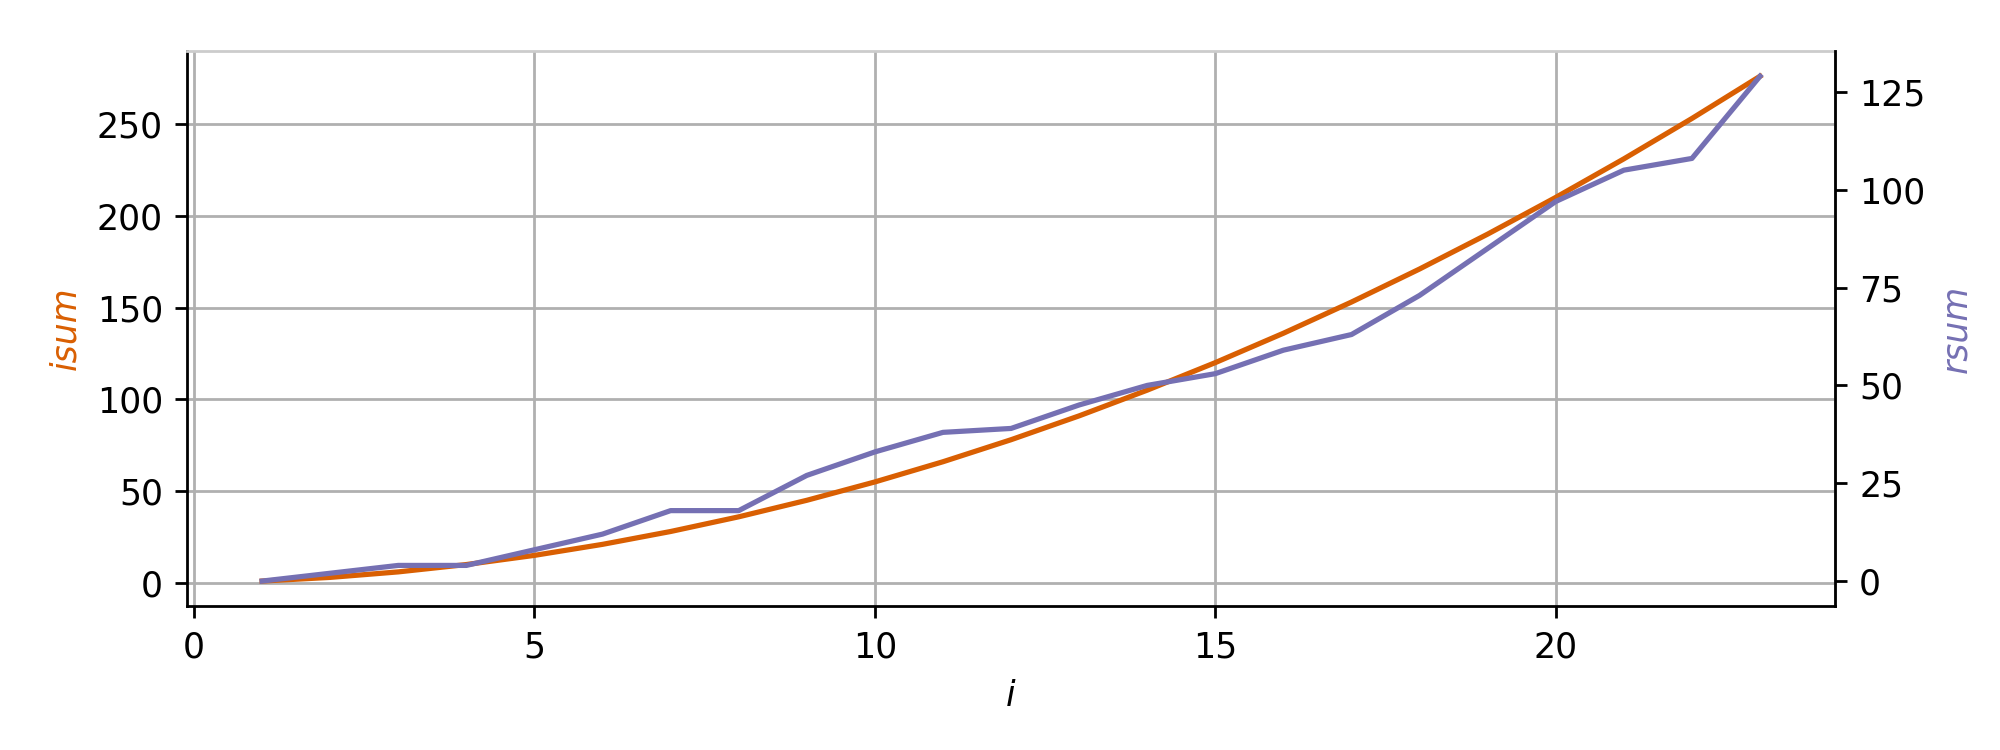

In [4]:
line_plot = tw.Visualizer(st_isum, vis_type='line', xtitle='i', ytitle='isum')
line_plot.show()

Let's take step further. Say, we plot rsum as well but, just for fun, in the *same plot* as isum above. That's easy with the optional `host` parameter:

In [5]:
line_plot2 = tw.Visualizer(st_rsum, vis_type='line', host=line_plot, ytitle='rsum')

This instantly changes our line plot and a new Y-Axis is automatically added for our second stream. TensorWatch allows you to add multiple streams in same visualizer.

Are you curious about statistics of these two streams? Let's display the live statistics of both streams side by side! To do this, we will use the `cell` parameter for the second visualization to place right next to the first one:

In [6]:
istats = tw.Visualizer(st_isum, vis_type='summary')
istats.show()

rstats = tw.Visualizer(st_rsum, vis_type='summary', cell=istats)